In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [19]:
df_raw = pd.read_csv(
    'E:/Edureka_Python-Course/Data Sources/Day_14/bio-degradabale-data.csv',
    low_memory=False,
    sep=';',
)
df_raw = pd.read_csv(
    'E:/Edureka_Python-Course/Data Sources/Day_14/bio-degradabale-data.csv',
    low_memory=False,
    sep=';',
    names=range(len(df_raw.columns))
)

Two Classifications
RB vs NRB

In [20]:
df_raw.head().transpose()

,0,1,2,3,4
0,3.919,4.17,3.932,3,4.236
1,2.6909,2.1144,3.2512,2.7098,3.3944
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,31.4,30.8,26.7,20,29.4
8,2,1,2,0,2
9,0,1,4,2,4


In [26]:
y = df_raw.get(41)

0        RB
1        RB
2        RB
3        RB
4        RB
       ... 
1050    NRB
1051    NRB
1052    NRB
1053    NRB
1054    NRB
Name: 41, Length: 1055, dtype: object

# Date is pretty much ready already

## RB:0, NRB:1
## 

In [49]:
y.replace(to_replace={'RB':0, 'NRB':1},inplace=True)

In [51]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1050    1
1051    1
1052    1
1053    1
1054    1
Name: 41, Length: 1055, dtype: int64

In [69]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def best_number_of_nodes(train_x, test_x, train_y, test_y):
    leaf_nodes = [1,5,10,50] + list(range(100, 1001, 100))
    RMSEs = []
    for node in leaf_nodes:
        model = RandomForestClassifier()
        model.fit(train_x, train_y)
        y_pred = model.predict(test_x)
        RMSEs.append(RMSE(test_y, y_pred))
    plt.plot(leaf_nodes,RMSEs)
    return RMSEs
    

In [56]:
train_x, test_x, train_y, test_y = train_test_split(
    df_raw.drop(41, axis=1), y,
    test_size = 0.2,
    random_state=50
)

[0.3770677588799258,
 0.3894339068089884,
 0.38330070607764455,
 0.40727972850509614,
 0.40727972850509614,
 0.3894339068089884,
 0.41305703449290854,
 0.40141928299260093,
 0.40141928299260093,
 0.41305703449290854,
 0.3954720018729554,
 0.38330070607764455,
 0.3954720018729554,
 0.41305703449290854]

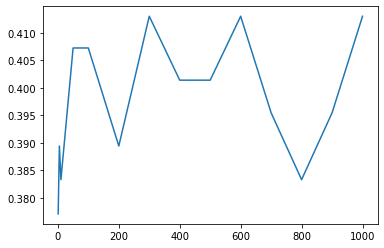

In [70]:
best_number_of_nodes(train_x, test_x, train_y, test_y)

In [103]:
model_randForest = RandomForestClassifier(max_leaf_nodes=800, max_features=40)
model_randForest.fit(train_x, train_y)


RandomForestClassifier(max_features=40, max_leaf_nodes=800)

In [108]:
confusion_matrix(test_y, model_randForest.predict(test_x))

array([[ 56,  12],
       [ 21, 122]], dtype=int64)

In [105]:
accuracy_score(test_y, model_randForest.predict(test_x))

0.8436018957345972

In [104]:
RMSE(test_y,model_randForest.predict(test_x))

0.3954720018729554

In [97]:
model_KNM = KMeans(n_clusters=2, n_init=100, max_iter=500)
model_KNM.fit(train_x)

KMeans(max_iter=500, n_clusters=2, n_init=100)

In [109]:
confusion_matrix(test_y, model_KNM.predict(test_x))

array([[ 17,  51],
       [ 41, 102]], dtype=int64)

In [107]:
accuracy_score(test_y, model_KNM.predict(test_x))

0.5639810426540285

In [98]:
RMSE(test_y, model_KNM.predict(test_x))

0.6603173156490534

# Models to test against:
     > Regression is useless
     > Random Forests
     > KNM